Academic license - for non-commercial use only - expires 2021-06-10
Using license file C:\Users\htnguyen1\gurobi.lic
approximate log= [1.4349462992058193e-05, -0.6931090773000896, -1.3862036302710674, -2.0792443052222627, -2.7721919711766247, -3.4649889266975578, -4.157555111841701, -4.849782482368239, -5.541534165349823, -6.232640558346613, -6.922901019790476, -7.61206957502052, -8.299869688650137, -8.985990941703704, -9.67007266955424]
true log= [0.0, -0.6931471805599453, -1.3862943611198906, -2.0794415416798357, -2.772588722239781, -3.4657359027997265, -4.1588830833596715, -4.852030263919617, -5.545177444479562, -6.238324625039508, -6.931471805599453, -7.6246189861593985, -8.317766166719343, -9.010913347279288, -9.704060527839234]


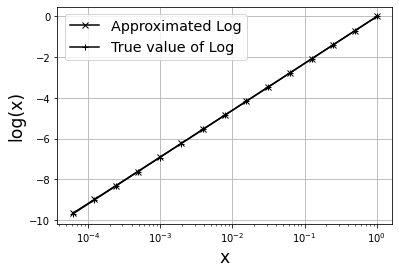

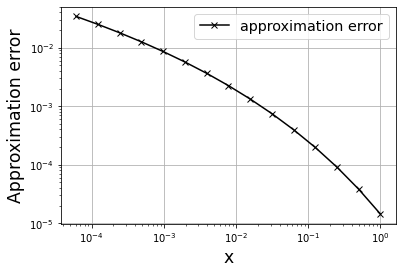

approximate log= [1.4349462992058193e-05, -0.6931090773000896, -1.3862036302710674, -2.0792443052222627, -2.7721919711766247, -3.4649889266975578, -4.157555111841701, -4.849782482368239, -5.541534165349823, -6.232640558346613, -6.922901019790476, -7.61206957502052, -8.299869688650137, -8.985990941703704, -9.67007266955424]
true log= [0.0, -0.6931471805599453, -1.3862943611198906, -2.0794415416798357, -2.772588722239781, -3.4657359027997265, -4.1588830833596715, -4.852030263919617, -5.545177444479562, -6.238324625039508, -6.931471805599453, -7.6246189861593985, -8.317766166719343, -9.010913347279288, -9.704060527839234]


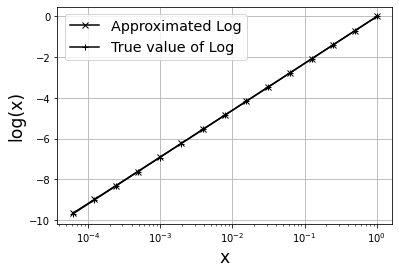

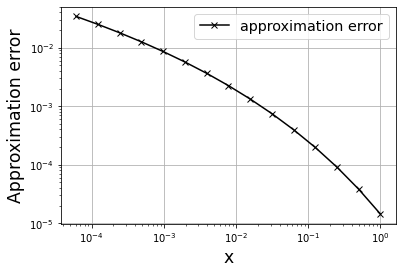

approximate log= [1.4349462992058193e-05, -0.6931090773000896, -1.3862036302710674, -2.0792443052222627, -2.7721919711766247, -3.4649889266975578, -4.157555111841701, -4.849782482368239, -5.541534165349823, -6.232640558346613, -6.922901019790476, -7.61206957502052, -8.299869688650137, -8.985990941703704, -9.67007266955424]
true log= [0.0, -0.6931471805599453, -1.3862943611198906, -2.0794415416798357, -2.772588722239781, -3.4657359027997265, -4.1588830833596715, -4.852030263919617, -5.545177444479562, -6.238324625039508, -6.931471805599453, -7.6246189861593985, -8.317766166719343, -9.010913347279288, -9.704060527839234]


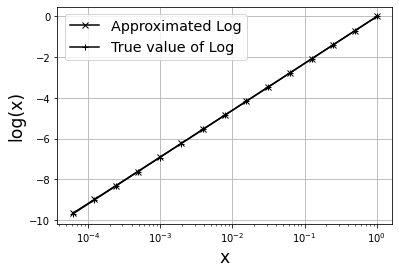

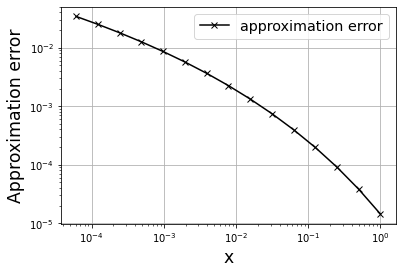

approximate log= [1.4349462992058193e-05, -0.6931090773000896, -1.3862036302710674, -2.0792443052222627, -2.7721919711766247, -3.4649889266975578, -4.157555111841701, -4.849782482368239, -5.541534165349823, -6.232640558346613, -6.922901019790476, -7.61206957502052, -8.299869688650137, -8.985990941703704, -9.67007266955424]
true log= [0.0, -0.6931471805599453, -1.3862943611198906, -2.0794415416798357, -2.772588722239781, -3.4657359027997265, -4.1588830833596715, -4.852030263919617, -5.545177444479562, -6.238324625039508, -6.931471805599453, -7.6246189861593985, -8.317766166719343, -9.010913347279288, -9.704060527839234]


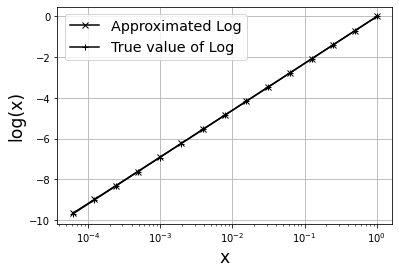

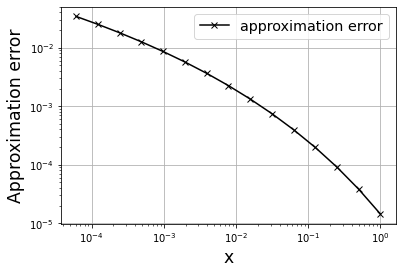

In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
from math import *
from time import time

def ellipk(x):
    return pi/(2* agm(1, x))
N =5
M =0

def log_approximation(N,M,X):
    #define cvx variables     
    a = [cvx.Variable(shape =(1,), nonneg=True) for i in range(N)]
    b = [cvx.Variable(shape =(1,), nonneg=True) for i in range(N)]
    x = cvx.Variable(1, nonneg=True)
    u = cvx.Variable(1, nonneg=True)
    z = cvx.Variable(1, nonneg=True)
    t = cvx.Variable(1)
    constraints =[]
    scalar =2**M   
    constraints += [x<= X]
    constraints += [a[0] == 1]
    constraints += [b[0] == (10**(-(N-1)))*x]

    v=20
    xi = cvx.Variable((N,v+1),nonneg=True)
    eta =cvx.Variable((N,v+1),nonneg=True)    
    for n in range(N):
#        constraints += [a[n] >= 0]
#        constraints += [b[n] >= 0]
        if n< N-1:
            constraints += [2*a[n+1] == (a[n]+b[n])]
#            constraints += [quad_over_lin(b[n+1], a[n]) <= b[n]]   #b[n+1] <= sqrt(a[n]*b[n])]    #linearize this one #
            constraints += [xi[n,v] <= 2*a[n+1] ] #(a[n]+b[n]) ]
            constraints += [eta[n,v] <= xi[n,v]*tan(pi/(2**(v+1)))]
            for k in range(1,v+1):
                constraints += [xi[n,k]== xi[n,k-1]*cos(pi/(2**(k+1))) + eta[n,k-1]*sin(pi/(2**(k+1)))]
                constraints += [eta[n,k]>= -xi[n,k-1]*sin(pi/(2**(k+1))) + eta[n,k-1]*cos(pi/(2**(k+1)))]
                constraints += [eta[n,k]>= xi[n,k-1]*sin(pi/(2**(k+1))) - eta[n,k-1]*cos(pi/(2**(k+1)))]              
            constraints += [xi[n,0] >=  2*b[n+1]]
            constraints += [eta[n,0] >= (a[n]-b[n]) ]
            
#    constraints += [quad_over_lin(1, u) <= (a[-1]+ b[-1])/pi] #linearize this one
    constraints += [xi[N-1,v]  <= (u+a[-1]+b[-1]) ]
    constraints += [eta[N-1,v] <= xi[N-1,v]*tan(pi/(2**(v+1)))]
    for k in range(1,v+1):
        constraints += [xi[N-1,k]== xi[N-1,k-1]*cos(pi/(2**(k+1))) + eta[N-1,k-1]*sin(pi/(2**(k+1)))]
        constraints += [eta[N-1,k]>= -xi[N-1,k-1]*sin(pi/(2**(k+1))) + eta[N-1,k-1]*cos(pi/(2**(k+1)))]
        constraints += [eta[N-1,k]>= xi[N-1,k-1]*sin(pi/(2**(k+1))) - eta[N-1,k-1]*cos(pi/(2**(k+1)))]
        constraints += [xi[N-1,0] >= 2*sqrt(pi)]
    constraints += [eta[N-1,0] >= (u-a[-1]-b[-1])]
    constraints += [eta[N-1,0] >= -(u-a[-1]-b[-1])]                             
    constraints += [u+ t - ellipk(10**(-(N-1))) <=  N*10**(-2*N+2)]
    constraints += [u+ t - ellipk(10**(-(N-1))) >= -N*10**(-2*N+2)]

#    constraints += [u+ t - ellipk(10**(-(N-1))) ==  0 ]    
    prob = cvx.Problem(cvx.Maximize(t), constraints) 
    result =prob.solve(solver='GUROBI',verbose=False) #, verbose=True
    return result
    #result = prob.solve(solver=CPLEX, verbose=True, cplex_params={"preprocessing.qcpduals": 0,  "preprocessing.presolve": 1, "barrier.algorithm": 3})
    
for M in range(1,5):   
    X=1
    step=(1-0.01)/100
    log_result=[]
    log_M=[]
    origin_apprx=[]
    lower_bound=[]
    for i in range(15):
        log_M.append(X)
        result = log_approximation(N,M,X)
        log_result.append(result) 
        X=0.5*X

    #origin_apprx=[log(4) - ellipk(X) -log(X) for X in log_M]

    print("approximate log=", log_result)
    log_true_value =[log(M) for M in log_M]
    print("true log=",  log_true_value)

    #print('near origin approxiation', origin_apprx)

    # Create plots with pre-defined labels.
    fig, ax = plt.subplots()
    ax.plot(log_M, log_result, 'k-x', label='Approximated Log')
    ax.plot(log_M, log_true_value, 'k-+', label='True value of Log')
    plt.xscale('log')
    
    plt.xlabel('x', fontsize='xx-large')
    plt.ylabel('log(x)', fontsize='xx-large')  
    legend = ax.legend(loc='best', shadow=False, fontsize='x-large')
    
    # Put a nicer background color on the legend.
    #legend.get_frame().set_facecolor('C0')
    plt.grid(True)
    plt.show()

    # Create plots with pre-defined labels.
    fig, ax = plt.subplots()
    ax.plot(log_M, [log_result[i] - log_true_value[i] for i in range(len(log_M))], 'k-x', label='approximation error')
    plt.xscale('log')
    plt.yscale('log')    
    plt.xlabel('x', fontsize='xx-large')
    plt.ylabel('Approximation error', fontsize='xx-large')
    legend = ax.legend(loc='best', shadow=False, fontsize='x-large')    
    # Put a nicer background color on the legend.
    #legend.get_frame().set_facecolor('C0')   
    plt.grid(True)
    plt.show()


In [ ]:
approximate log= [1.4349459737772463e-05, -0.693109077374439, -1.386203630275343, -2.079244305231347, -2.7721918685013716, -3.464988927077231, -4.157555112168092, -4.849782482410944, -5.541535399611611, -6.2326407380089535, -6.9229010194992355, -7.612069585021544, -8.299869698582597, -8.985990954450276, -9.670072684767383]
true log= [0.0, -0.6931471805599453, -1.3862943611198906, -2.0794415416798357, -2.772588722239781, -3.4657359027997265, -4.1588830833596715, -4.852030263919617, -5.545177444479562, -6.238324625039508, -6.931471805599453, -7.6246189861593985, -8.317766166719343, -9.010913347279288, -9.704060527839234]